In [1]:
import tensorflow as tf
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram, stft, istft
import matplotlib.pyplot as plt
import librosa
import librosa.display
from misceallaneous import getWavFileAsNpArray, displaySpectrogram
from IPython.display import Audio

samplerate = 12000
nperseg = 1024

clean0 = getWavFileAsNpArray("../dataset_2/clean/p1.wav")
white0 = getWavFileAsNpArray("../dataset_2/white/p1.wav")
clean0 = np.array(clean0, dtype="int32")
white0 = np.array(white0, dtype="int32")


min_clean = np.min(clean0)
max_clean = np.max(clean0)
clean = (clean0 - min_clean)/(max_clean-min_clean)

min_white = np.min(white0)
max_white = np.max(white0)
white = (white0 - min_white)/(max_white-min_white)


In [2]:
clean_split = []
white_split = []

samples_length = nperseg

for i in range(0, clean.shape[0]-samples_length, samples_length):
    clean_split.append(clean[i:i+samples_length])
    white_split.append(white[i:i+samples_length])
clean_split = np.array(clean_split)
white_split = np.array(white_split)

c, t, Cxx_test = stft(np.array((clean_split[0]*(max_clean-min_clean)) + min_clean), fs=samplerate, nperseg=nperseg)
c, t, Vxx_test = stft(np.array((white_split[0]*(max_white-min_white)) + min_white), fs=samplerate, nperseg=nperseg)
print(clean_split.shape)
print(white_split.shape)

(10659, 1024)
(10659, 1024)


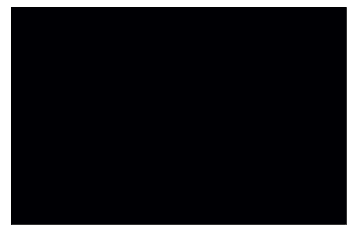

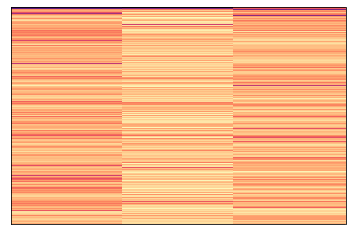

In [3]:
displaySpectrogram(Cxx_test)
plt.show()
displaySpectrogram(Vxx_test)
plt.show()

In [1]:
def simple_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    x = tf.keras.layers.Dense(int(size*0.5), activation="relu")(inputs)
    outputs = tf.keras.layers.Dense(size, activation="relu")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

def simple_skip_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    x1 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(int(size*0.5), activation="linear")(inputs))
    x2 = (tf.keras.layers.Dense(int(size*0.2), activation="linear")(x1))
    x3 = (tf.keras.layers.Dense(int(size*0.2), activation="linear")(x2))
    x4 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(int(size*0.5), activation="linear")(x3))
    x5 = tf.keras.layers.Add()([x1, x4])
    x6 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(size, activation="linear")(x5))
    x7 = tf.keras.layers.Add()([x6, inputs])
    outputs = tf.keras.layers.Dense(size, activation="sigmoid")(x7)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='bce', metrics=['accuracy'])
    return model

model = simple_skip_autoencoder(clean_split.shape[1])

NameError: name 'clean_split' is not defined

In [2]:
input_test0 = np.reshape(white_split[0, :], (1, white_split.shape[1]))
input_test1 = np.reshape(white_split[1, :], (1, white_split.shape[1]))
input_test2 = np.reshape(white_split[2, :], (1, white_split.shape[1]))
b = np.reshape(input_test0.T, (white_split.shape[1],))
c = np.reshape(input_test1.T, (white_split.shape[1],))
d = np.reshape(input_test2.T, (white_split.shape[1],))
a = np.concatenate((b, c, d))

c, t, Vxx_input_test = stft(a, fs=samplerate, nperseg=nperseg)
displaySpectrogram(Vxx_input_test)
plt.show()

input_test0 = np.reshape(clean_split[0, :], (1, clean_split.shape[1]))
input_test1 = np.reshape(clean_split[1, :], (1, clean_split.shape[1]))
input_test2 = np.reshape(clean_split[2, :], (1, clean_split.shape[1]))
b = np.reshape(input_test0.T, (clean_split.shape[1],))
c = np.reshape(input_test1.T, (clean_split.shape[1],))
d = np.reshape(input_test2.T, (clean_split.shape[1],))
a = np.concatenate((b, c, d))

c, t, Vxx_input_test = stft(a, fs=samplerate, nperseg=nperseg)
displaySpectrogram(Vxx_input_test)
plt.show()


for _ in range(10):
    model.fit(white_split, clean_split, epochs=15, batch_size=16)

    output_test0 = model.predict(input_test0)
    output_test1 = model.predict(input_test1)
    output_test2 = model.predict(input_test2)
    e = np.reshape(output_test0.T, (white_split.shape[1],))
    f = np.reshape(output_test1.T, (white_split.shape[1],))
    g = np.reshape(output_test2.T, (white_split.shape[1],))
    h = np.concatenate((e, f, g))
    c, t, Vxx_test = stft(h, fs=samplerate, nperseg=nperseg)
    displaySpectrogram(Vxx_test)
    plt.show()

NameError: name 'np' is not defined

In [7]:
i = [np.reshape(white_split[k, :], (1, white_split.shape[1])) for k in range(25)]
o = [model.predict(i[k]) for k in range(len(i))]
p = [np.reshape(i[k].T, (white_split.shape[1],)) for k in range(len(o))]
q = [np.reshape(o[k].T, (white_split.shape[1],)) for k in range(len(o))]


a = np.concatenate(p)
b = np.concatenate(q)
Audio(a, rate=samplerate)

In [8]:
Audio(b, rate=samplerate)